# HeapSort Algorithm Using MinHeap in Python

#### CSE 619 Design and Analysis of Algorithms - Fall 2021 - Christian Tioye

In [188]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

In [189]:
# %pip install matplotlib
# %pip install numpy

### Definining the Build Min Heap function based by Max Heap from Github

Source: https://github.com/TheAlgorithms/Python/blob/master/sorts/heap_sort.py

#### Define the MinHeapify function

In [190]:
def MinHeapify(unsorted, index, heapSize):
    # set the smallest value at the root node and define its left and right children as (2 x index + 1) and (2 x index + 2)
    smallest, left, right = index, 2 * index + 1, 2 * index + 2
    
    # verify that root node has a left child and its index is valid
    if left < heapSize and unsorted[left] < unsorted[smallest]:
        smallest = left
    
    # verify that root node has a right child and index does not overflow
    if right < heapSize and unsorted[right] < unsorted[smallest]:
        smallest = right

    # swap the root node with the smallest value in the Heap every time
    if smallest != index:
        unsorted[smallest], unsorted[index] = unsorted[index], unsorted[smallest]
        # after swapping root with smallest node, rebuild the heap
        MinHeapify(unsorted, smallest, heapSize)

#### Define the Heap Sort function

In [191]:
def HeapSort(unsorted):
    size = len(unsorted)
    for i in range(size // 2 - 1, -1, -1):
        MinHeapify(unsorted, i, size)
    for i in range(size - 1, 0, -1):
        unsorted[0], unsorted[i] = unsorted[i], unsorted[0]
        MinHeapify(unsorted, 0, i)
    return unsorted

### Start of the Driver function

In [192]:
if __name__ == "__main__":
    unsorted = []
    for num in range(500):
        unsorted.append(random.randint(0, 101))

#### Plot a histogram of the input

(0.0, 70.0)

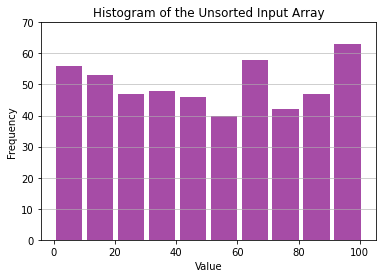

In [193]:
n, bins, patches = plt.hist(x=unsorted, bins='auto', color='purple',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Unsorted Input Array')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### Demo Timing the Heap Sort Function

In [194]:
tic = time.perf_counter()
unsorted = HeapSort(unsorted)
print("\nCreated a MinHeap with 500 values:\n\n\t", unsorted[0:20], '...', unsorted[-20:-1])
    
sorted = []
for idx in range(len(unsorted) - 1, 0, -1):
    sorted.append(unsorted[idx])
print("\nThe Final Sorted Array\n\n\t", sorted[0:20], '...', sorted[-20:-1])
toc = time.perf_counter()  
print(f'\nHeapSort algorithm took {toc - tic:0.5f} seconds')


Created a MinHeap with 500 values:

	 [101, 101, 101, 101, 101, 101, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98] ... [3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

The Final Sorted Array

	 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3] ... [98, 98, 98, 99, 99, 99, 99, 99, 99, 99, 99, 99, 100, 100, 100, 101, 101, 101, 101]

HeapSort algorithm took 0.00512 seconds


## Insertion Sort Routine based on tutorial from Career Karma

Source: https://careerkarma.com/blog/python-insertion-sort/

In [195]:
def InsertionSort(unsorted):
    for number in range(1, len(unsorted)):
        current = unsorted[number]
        index = number - 1

        while index >= 0 and current < unsorted[index]:
            unsorted[index + 1] = unsorted[index]
            index -= 1

            unsorted[index + 1] = current

#### Demo Timing the Insertion Sort Function

In [196]:
print("\nOriginal Unsorted Array with 500 values:\n\n\t", unsorted[0:20], '...', unsorted[-20:-1])
toSort = []
for indx in range(len(unsorted)):
    toSort.append(unsorted[indx])
tic = time.perf_counter()
InsertionSort(toSort)
print("\nThe Final Sorted Array\n\n\t", toSort[0:20], '...', toSort[-20:-1])
toc = time.perf_counter()  
print(f'\nInsertion Sort algorithm took {toc - tic:0.5f} seconds')


Original Unsorted Array with 500 values:

	 [101, 101, 101, 101, 101, 101, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98] ... [3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

The Final Sorted Array

	 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3] ... [98, 98, 99, 99, 99, 99, 99, 99, 99, 99, 99, 100, 100, 100, 101, 101, 101, 101, 101]

Insertion Sort algorithm took 0.04437 seconds


### Run Time Comparison with increasing input sizes

In [197]:
# Array of input sizes, an empty array to hold the input array and the runtimes for plotting
inputSizes, HeapRuntimes, InsertRuntimes, numbers = [10, 50, 100, 1000, 10000, 100000], [], [], []

In [198]:
# generate a certain size input and measure the running time for HeapSort algorithm
for size in inputSizes:
    for num in range(size):
        numbers.append(random.randint(0, 101))
    htic = time.perf_counter()
    # create a min heap
    unsortedNums = HeapSort(numbers)
    sorted = []
    # reverse the array
    for idx in range(len(unsorted) - 1, 0, -1):
        sorted.append(unsorted[idx])
    htoc = time.perf_counter()
    HeapRuntimes.append(round(htoc - htic, 4))
    print("Size of input ", len(numbers))
    # reset the input array for the next iteration
    numbers = []

Size of input  10
Size of input  50
Size of input  100
Size of input  1000
Size of input  10000
Size of input  100000


In [199]:
print(HeapRuntimes)

[0.0021, 0.0006, 0.0009, 0.0071, 0.0721, 1.0269]


In [200]:
print(numbers)

[]


In [201]:
# generate smaller size of input for the Insertion sort due to quadratic runtime
for size in [10, 50, 100, 1000, 10000, 20000]:
    for num in range(size):
        numbers.append(random.randint(0, 101))
    itic = time.perf_counter()
    # sort the input array in place
    InsertionSort(numbers)
    itoc = time.perf_counter()
    InsertRuntimes.append(round(itoc - itic, 4))
    print("Size of input array", len(numbers))
    # reset the input array for next iteration
    numbers = []

Size of input array 10
Size of input array 50
Size of input array 100
Size of input array 1000
Size of input array 10000
Size of input array 20000


In [202]:
print(InsertRuntimes)

[0.0, 0.0003, 0.001, 0.0726, 7.831, 27.3223]


### Plotting Algorithm runtimes to capture visual differences

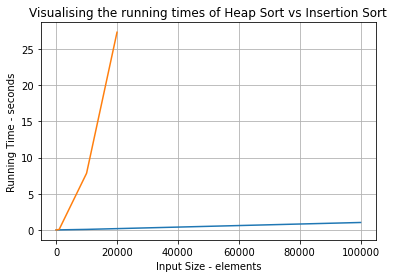

In [203]:
# Data for plotting
plt.plot(inputSizes, HeapRuntimes)
plt.plot([10, 50, 100, 1000, 10000, 20000], InsertRuntimes)

plt.xlabel('Input Size - elements')
plt.ylabel('Running Time - seconds')
plt.title('Visualising the running times of Heap Sort vs Insertion Sort')
plt.grid()

# fig.savefig("project1.png")
plt.show()

#### The running time for the Insertion Sort algorithm increases dramatically as the input size increases, due to quadratic runtime. We were not able to run this algorithm using 100k input size. Heap Sort is extremely efficient even when the input size increases